In [1]:
from fedn import APIClient
import time
import uuid
import json
import matplotlib.pyplot as plt
import numpy as np
import collections

In [2]:
DISCOVER_HOST = '127.0.0.1'
DISCOVER_PORT = 8092
client = APIClient(DISCOVER_HOST, DISCOVER_PORT)

In [4]:
client.list_sessions()

{'count': 3,
 'result': [{'aggregator': 'fedavg',
   'buffer_size': -1,
   'clients_requested': 8,
   'clients_required': 1,
   'committed_at': 'Tue, 20 Feb 2024 14:16:51 GMT',
   'delete_models_storage': True,
   'helper_type': 'numpyhelper',
   'model_id': '186cb6f0-6341-49ca-943e-d36296fedca0',
   'round_timeout': 180,
   'rounds': 10,
   'session_id': 'FEDn-test2',
   'task': '',
   'validate': True},
  {'aggregator': 'fedavg',
   'buffer_size': -1,
   'clients_requested': 8,
   'clients_required': 1,
   'committed_at': 'Tue, 20 Feb 2024 12:04:26 GMT',
   'delete_models_storage': True,
   'helper_type': 'numpyhelper',
   'model_id': '186cb6f0-6341-49ca-943e-d36296fedca0',
   'round_timeout': 180,
   'rounds': 10,
   'session_id': 'FedTest',
   'task': '',
   'validate': True},
  {'aggregator': 'fedavg',
   'buffer_size': -1,
   'clients_requested': 8,
   'clients_required': 1,
   'committed_at': 'Tue, 20 Feb 2024 11:26:33 GMT',
   'delete_models_storage': True,
   'helper_type': 'n

In [14]:
session_id = input("Provide a session_id: ")

Provide a session_id: experiment_fedavg_01


In [29]:
models = client.list_models(session_id)
models

{'count': 10,
 'result': [{'committed_at': 'Tue, 20 Feb 2024 11:33:50 GMT',
   'model': '485e7d67-e4fe-4197-b7d8-c7941ce9f15f',
   'session_id': 'experiment_fedavg_01'},
  {'committed_at': 'Tue, 20 Feb 2024 11:33:06 GMT',
   'model': '6b8e87bb-4630-48e0-94a0-8d4013f48cf1',
   'session_id': 'experiment_fedavg_01'},
  {'committed_at': 'Tue, 20 Feb 2024 11:32:22 GMT',
   'model': 'b9863a8f-91f6-41f8-85d5-9272abbdcbd9',
   'session_id': 'experiment_fedavg_01'},
  {'committed_at': 'Tue, 20 Feb 2024 11:31:34 GMT',
   'model': '5f9c6ed1-8d50-4f58-82ec-d30b06e8346a',
   'session_id': 'experiment_fedavg_01'},
  {'committed_at': 'Tue, 20 Feb 2024 11:30:50 GMT',
   'model': '67642a7b-3312-4538-b006-6a3057c654b9',
   'session_id': 'experiment_fedavg_01'},
  {'committed_at': 'Tue, 20 Feb 2024 11:30:05 GMT',
   'model': 'fba286c8-b0ee-438b-b532-d06adfb1e03a',
   'session_id': 'experiment_fedavg_01'},
  {'committed_at': 'Tue, 20 Feb 2024 11:29:21 GMT',
   'model': 'fda4b653-2be0-4da3-9829-3fb95a17038

In [28]:
model_count = models['count']
model_count

10

In [34]:
results = models['result']
results.reverse()
results

[{'committed_at': 'Tue, 20 Feb 2024 11:27:04 GMT',
  'model': '65c4c90e-5619-4012-886e-5549016bce6c',
  'session_id': 'experiment_fedavg_01'},
 {'committed_at': 'Tue, 20 Feb 2024 11:27:50 GMT',
  'model': '757ea7ae-c177-4247-8189-927f64f4a262',
  'session_id': 'experiment_fedavg_01'},
 {'committed_at': 'Tue, 20 Feb 2024 11:28:34 GMT',
  'model': '86c0285c-098d-4899-9b0c-68ef73c37a26',
  'session_id': 'experiment_fedavg_01'},
 {'committed_at': 'Tue, 20 Feb 2024 11:29:21 GMT',
  'model': 'fda4b653-2be0-4da3-9829-3fb95a17038a',
  'session_id': 'experiment_fedavg_01'},
 {'committed_at': 'Tue, 20 Feb 2024 11:30:05 GMT',
  'model': 'fba286c8-b0ee-438b-b532-d06adfb1e03a',
  'session_id': 'experiment_fedavg_01'},
 {'committed_at': 'Tue, 20 Feb 2024 11:30:50 GMT',
  'model': '67642a7b-3312-4538-b006-6a3057c654b9',
  'session_id': 'experiment_fedavg_01'},
 {'committed_at': 'Tue, 20 Feb 2024 11:31:34 GMT',
  'model': '5f9c6ed1-8d50-4f58-82ec-d30b06e8346a',
  'session_id': 'experiment_fedavg_01'},

In [61]:
validations = []

for result in results:
    worker_results = client.list_validations(modelId=result['model'])
    result_ids = [result_id for result_id in worker_results]
    for result_id in result_ids:
        worker_result = worker_results.get(result_id)
        client_type = 'benign'
        
        if 'malignant' in worker_result['sender']['name']:
            client_type = 'malignant'
            
        validation = {
            'model_committed_at': result['committed_at'],
            'session_id': result['session_id'],
            'model': result['model'],
            'client_name': worker_result['sender']['name'],
            'client_role': worker_result['sender']['role'],
            'client_type': client_type,
            'training_loss': json.loads(worker_result['data'])['training_loss'],
            'training_accuracy': json.loads(worker_result['data'])['training_accuracy'],
            'test_loss': json.loads(worker_result['data'])['test_loss'],
            'test_accuracy': json.loads(worker_result['data'])['test_accuracy']
        }
        
        validations.append(validation)
        

In [64]:
validations

[{'model_committed_at': 'Tue, 20 Feb 2024 11:27:04 GMT',
  'session_id': 'experiment_fedavg_01',
  'model': '65c4c90e-5619-4012-886e-5549016bce6c',
  'client_name': 'malignant_client1',
  'client_role': 'WORKER',
  'client_type': 'malignant',
  'training_loss': 1.4829061031341553,
  'training_accuracy': 0.7531999945640564,
  'test_loss': 1.392546534538269,
  'test_accuracy': 0.8059999942779541},
 {'model_committed_at': 'Tue, 20 Feb 2024 11:27:04 GMT',
  'session_id': 'experiment_fedavg_01',
  'model': '65c4c90e-5619-4012-886e-5549016bce6c',
  'client_name': 'benign_client1',
  'client_role': 'WORKER',
  'client_type': 'benign',
  'training_loss': 1.482998013496399,
  'training_accuracy': 0.7504000067710876,
  'test_loss': 1.570511817932129,
  'test_accuracy': 0.6919999718666077},
 {'model_committed_at': 'Tue, 20 Feb 2024 11:27:04 GMT',
  'session_id': 'experiment_fedavg_01',
  'model': '65c4c90e-5619-4012-886e-5549016bce6c',
  'client_name': 'benign_client3',
  'client_role': 'WORKER',

In [66]:
set([validation['client_name'] for validation in validations])

{'benign_client1', 'benign_client2', 'benign_client3', 'malignant_client1'}

In [71]:
graph_data = {
    'training_loss': {
        client: [] for client in set([validation['client_name'] for validation in validations])
    },
    'training_accuracy': {
        client: [] for client in set([validation['client_name'] for validation in validations])
    },
    'test_loss': {
        client: [] for client in set([validation['client_name'] for validation in validations])
    },
    'test_accuracy': {
        client: [] for client in set([validation['client_name'] for validation in validations])
    }
}

In [73]:
for validation in validations:
    graph_data['training_loss'][validation['client_name']].append(validation['training_loss'])
    graph_data['training_accuracy'][validation['client_name']].append(validation['training_accuracy'])
    graph_data['test_loss'][validation['client_name']].append(validation['test_loss'])
    graph_data['test_accuracy'][validation['client_name']].append(validation['test_accuracy'])

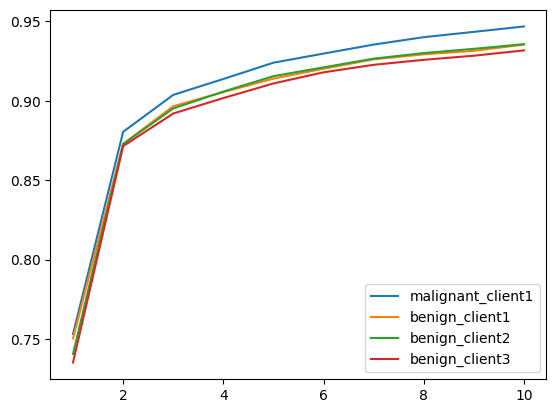

In [93]:
x = range(1,model_count+1)
plt.plot(x, graph_data['training_accuracy'][list(graph_data['training_accuracy'].keys())[0]], \
         x, graph_data['training_accuracy'][list(graph_data['training_accuracy'].keys())[1]], \
         x, graph_data['training_accuracy'][list(graph_data['training_accuracy'].keys())[2]], \
         x, graph_data['training_accuracy'][list(graph_data['training_accuracy'].keys())[3]])
plt.legend(graph_data['training_accuracy'].keys())
plt.show()